# Zaimportowanie używanych bibliotek

In [426]:
import json
from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# Ustawienie wielkości wykresów

In [371]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 10
plt.rcParams["xtick.labelsize"] = 12

pd.set_option('display.max_columns', None)


# Załadowanie i poprawka danych z pliku JSON

In [372]:
with open('anime_data.json') as json_file:
    anime_data = json.load(json_file)

for anime in anime_data:
    if not 'genres' in anime:
        anime['genres'] = None
    if not 'start_date' in anime:
        anime['start_date'] = None
    if not 'end_date' in anime:
        anime['end_date'] = None
    if not 'mean' in anime:
        anime['mean'] = None
    if not 'rank' in anime:
        anime['rank'] = None
    if not 'genres' in anime:
        anime['genres'] = None
    if not 'source' in anime:
        anime['source'] = None
    if not 'rating' in anime:
        anime['rating'] = None
    if not 'main_picture' in anime:
        anime['main_picture'] = None
    if not 'start_season' in anime:
        anime['start_season'] = None

anime_df = pd.json_normalize(data=anime_data)
# df = pd.json_normalize(data = anime_data, record_path=['genres'], meta=['title', 'start_date'])

anime_df.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,5114,Fullmetal Alchemist: Brotherhood,2009-04-05,2010-07-04,9.14,1.0,3,2889889,1841769,white,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",tv,finished_airing,64,manga,1460,r,"[{'id': 4, 'name': 'Bones'}]","[{'node': {'id': 121, 'title': 'Fullmetal Alch...",[],"[{'node': {'id': 11061, 'title': 'Hunter x Hun...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Hagane no Renkinjutsushi: Fullmetal Alchemist...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,2009.0,spring,220557,2093504,98694,45288,431935,2889978,NaN,NaN
1,28977,Gintama°,2015-04-08,2016-03-30,9.08,2.0,335,536195,214575,white,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'...",tv,finished_airing,51,manga,1440,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]","[{'node': {'id': 15335, 'title': 'Gintama Movi...",[],"[{'node': {'id': 9863, 'title': 'SKET Dance', ...",https://api-cdn.myanimelist.net/images/anime/3...,https://api-cdn.myanimelist.net/images/anime/3...,[Gintama' (2015)],Gintama Season 4,銀魂°,2015.0,spring,59649,221722,21119,14969,218732,536191,NaN,NaN
2,9253,Steins;Gate,2011-04-06,2011-09-14,9.08,3.0,13,2242732,1237130,white,"[{'id': 8, 'name': 'Drama'}, {'id': 40, 'name'...",tv,finished_airing,24,visual_novel,1460,pg_13,"[{'id': 314, 'name': 'White Fox'}]","[{'node': {'id': 4975, 'title': 'ChäoS;HEAd', ...",[],"[{'node': {'id': 31240, 'title': 'Re:Zero kara...",https://api-cdn.myanimelist.net/images/anime/5...,https://api-cdn.myanimelist.net/images/anime/5...,[],Steins;Gate,STEINS;GATE,2011.0,spring,144862,1408789,78834,46827,563459,2242771,NaN,NaN


In [373]:
# anime_df = anime_df.astype({'title': str, 'start_date': str, 'end_date': str, 'rank': int})
anime_df.dtypes


id                                   int64
title                               object
start_date                          object
end_date                            object
mean                               float64
rank                               float64
popularity                           int64
num_list_users                       int64
num_scoring_users                    int64
nsfw                                object
genres                              object
media_type                          object
status                              object
num_episodes                         int64
source                              object
average_episode_duration             int64
rating                              object
studios                             object
related_anime                       object
related_manga                       object
recommendations                     object
main_picture.medium                 object
main_picture.large                  object
alternative

# Sortowanie ranking potem popularność i popularność potem ranking

In [374]:
anime_ranking_sort = anime_df.sort_values(by=['rank', 'popularity'], ascending=[
                                          True, False], ignore_index=True)
anime_ranking_sort.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,5114,Fullmetal Alchemist: Brotherhood,2009-04-05,2010-07-04,9.14,1.0,3,2889889,1841769,white,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",tv,finished_airing,64,manga,1460,r,"[{'id': 4, 'name': 'Bones'}]","[{'node': {'id': 121, 'title': 'Fullmetal Alch...",[],"[{'node': {'id': 11061, 'title': 'Hunter x Hun...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Hagane no Renkinjutsushi: Fullmetal Alchemist...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,2009.0,spring,220557,2093504,98694,45288,431935,2889978,NaN,NaN
1,28977,Gintama°,2015-04-08,2016-03-30,9.08,2.0,335,536195,214575,white,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'...",tv,finished_airing,51,manga,1440,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]","[{'node': {'id': 15335, 'title': 'Gintama Movi...",[],"[{'node': {'id': 9863, 'title': 'SKET Dance', ...",https://api-cdn.myanimelist.net/images/anime/3...,https://api-cdn.myanimelist.net/images/anime/3...,[Gintama' (2015)],Gintama Season 4,銀魂°,2015.0,spring,59649,221722,21119,14969,218732,536191,NaN,NaN
2,9253,Steins;Gate,2011-04-06,2011-09-14,9.08,3.0,13,2242732,1237130,white,"[{'id': 8, 'name': 'Drama'}, {'id': 40, 'name'...",tv,finished_airing,24,visual_novel,1460,pg_13,"[{'id': 314, 'name': 'White Fox'}]","[{'node': {'id': 4975, 'title': 'ChäoS;HEAd', ...",[],"[{'node': {'id': 31240, 'title': 'Re:Zero kara...",https://api-cdn.myanimelist.net/images/anime/5...,https://api-cdn.myanimelist.net/images/anime/5...,[],Steins;Gate,STEINS;GATE,2011.0,spring,144862,1408789,78834,46827,563459,2242771,NaN,NaN


In [375]:
anime_popularity_sort = anime_df.sort_values(
    by=['popularity', 'rank'], ascending=[True, False], ignore_index=True)
anime_popularity_sort.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,16498,Shingeki no Kyojin,2013-04-07,2013-09-29,8.53,101.0,1,3428988,2452366,white,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",tv,finished_airing,25,manga,1440,r,"[{'id': 858, 'name': 'Wit Studio'}]","[{'node': {'id': 18397, 'title': 'Shingeki no ...",[],"[{'node': {'id': 28623, 'title': 'Koutetsujou ...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,"[AoT, SnK]",Attack on Titan,進撃の巨人,2013.0,spring,178993,2995987,45935,53028,155069,3429012,NaN,NaN
1,1535,Death Note,2006-10-04,2007-06-27,8.62,74.0,2,3411970,2420119,white,"[{'id': 40, 'name': 'Psychological'}, {'id': 2...",tv,finished_airing,37,manga,1380,r,"[{'id': 11, 'name': 'Madhouse'}]","[{'node': {'id': 2994, 'title': 'Death Note: R...",[],"[{'node': {'id': 1575, 'title': 'Code Geass: H...",https://api-cdn.myanimelist.net/images/anime/9...,https://api-cdn.myanimelist.net/images/anime/9...,[DN],Death Note,デスノート,2006.0,fall,167049,2832329,97727,104402,210674,3412181,NaN,NaN
2,5114,Fullmetal Alchemist: Brotherhood,2009-04-05,2010-07-04,9.14,1.0,3,2889889,1841769,white,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",tv,finished_airing,64,manga,1460,r,"[{'id': 4, 'name': 'Bones'}]","[{'node': {'id': 121, 'title': 'Fullmetal Alch...",[],"[{'node': {'id': 11061, 'title': 'Hunter x Hun...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Hagane no Renkinjutsushi: Fullmetal Alchemist...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,2009.0,spring,220557,2093504,98694,45288,431935,2889978,NaN,NaN


# Rok ilość wydań

In [376]:
anime_year_count = anime_ranking_sort.copy()
anime_year_count['start_date'] = anime_year_count['start_date'].str.split(
    "-").str[0]
anime_year_count = anime_year_count['start_date'].value_counts().reset_index()
anime_year_count.columns = ['release_date', 'count']
anime_year_count = anime_year_count.sort_values(
    'release_date', ascending=True).reset_index()
anime_year_count = anime_year_count.drop(['index'], axis=1)
anime_year_count['release_date'] = pd.to_numeric(
    anime_year_count['release_date'])
anime_year_count


,release_date,count
0,1917,16
1,1918,8
2,1924,3
3,1925,6
4,1926,6
...,...,...
97,2019,898
98,2020,842
99,2021,841
100,2022,493


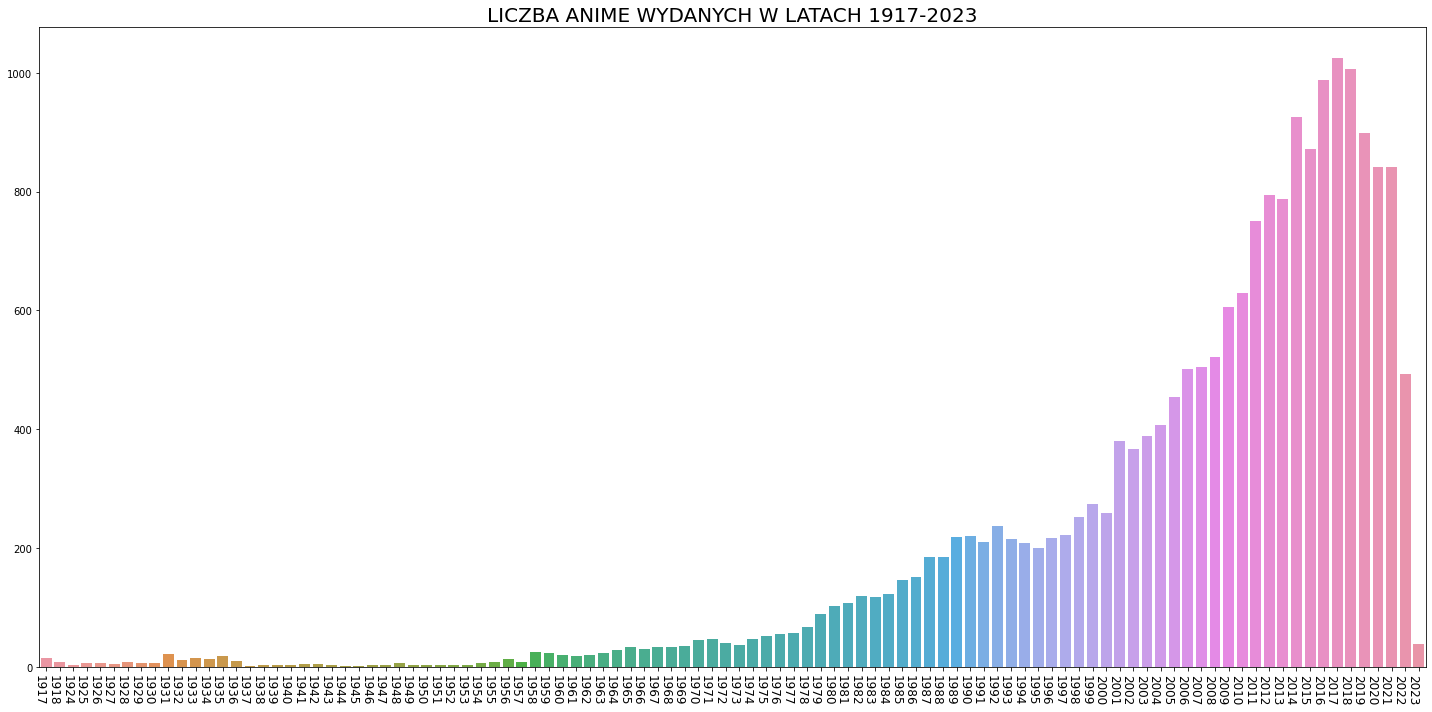

In [377]:
plot_years = sns.barplot(x='release_date', y='count', data=anime_year_count)
plot_years.set_title('LICZBA ANIME WYDANYCH W LATACH 1917-2023', fontsize=20)
ax = sns.countplot(x="release_date", data=anime_year_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90, ha="right")
plot_years.set_ylabel('')
plot_years.set_xlabel('')
plt.tight_layout()
plt.show()


In [378]:
anime_year_count_1970 = anime_year_count.copy()
anime_year_count_1970 = anime_year_count_1970[anime_year_count_1970['release_date'] >= 1970]
anime_year_count_1970 = anime_year_count_1970[anime_year_count_1970['release_date'] <= 2021]


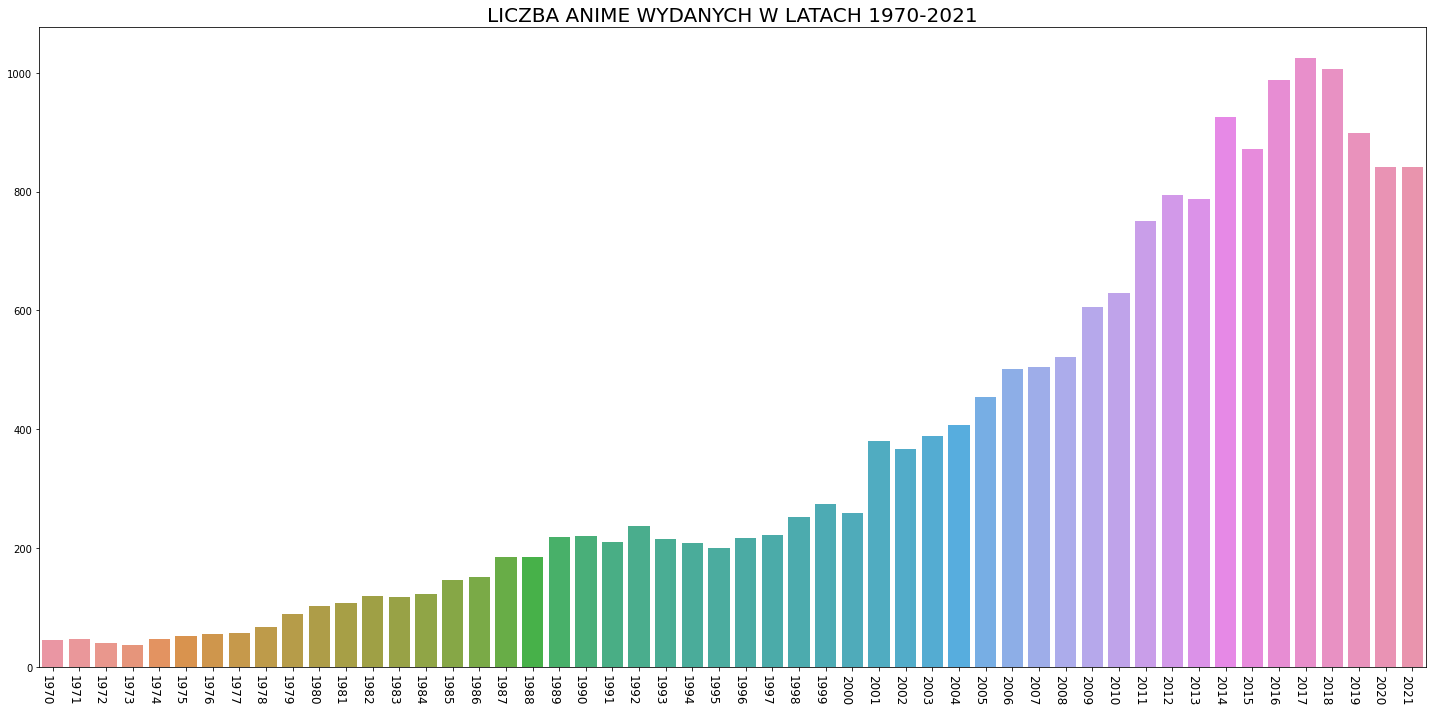

In [379]:
plot_years = sns.barplot(x='release_date', y='count',
                         data=anime_year_count_1970)
plot_years.set_title('LICZBA ANIME WYDANYCH W LATACH 1970-2021', fontsize=20)
ax = sns.countplot(x="release_date", data=anime_year_count_1970)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90, ha="right")
plot_years.set_ylabel('')
plot_years.set_xlabel('')
plt.tight_layout()
plt.show()


# Rok średnia ocena

In [380]:
anime_year_score = anime_popularity_sort.copy()
anime_year_score['start_date'] = anime_year_score['start_date'].str.split(
    "-").str[0]
anime_year_score.dropna(subset=['mean'], inplace=True)
# przynajmniej 2000 oglądających
anime_year_score = anime_year_score[anime_year_score['num_list_users'] > 2000]
anime_year_score = anime_year_score.groupby('start_date').apply(
    lambda x: x['mean'].sum()/len(x)).round(2).reset_index()
anime_year_score.columns = ['release_year', 'mean_score']
anime_year_score = anime_year_score.sort_values('release_year', ascending=True)
anime_year_score['release_year'] = pd.to_numeric(
    anime_year_score['release_year'])
anime_year_score = anime_year_score[anime_year_score['release_year'] <= 2021]
anime_year_score = anime_year_score[anime_year_score['release_year'] >= 1929]
anime_year_score = anime_year_score.reset_index(drop=True)
anime_year_score = anime_year_score.astype(
    {'release_year': str}, errors='raise')
anime_year_score


,release_year,mean_score
0,1929,5.89
1,1930,4.98
2,1931,5.38
3,1943,5.69
4,1945,5.18
...,...,...
63,2017,6.75
64,2018,6.82
65,2019,6.88
66,2020,6.87


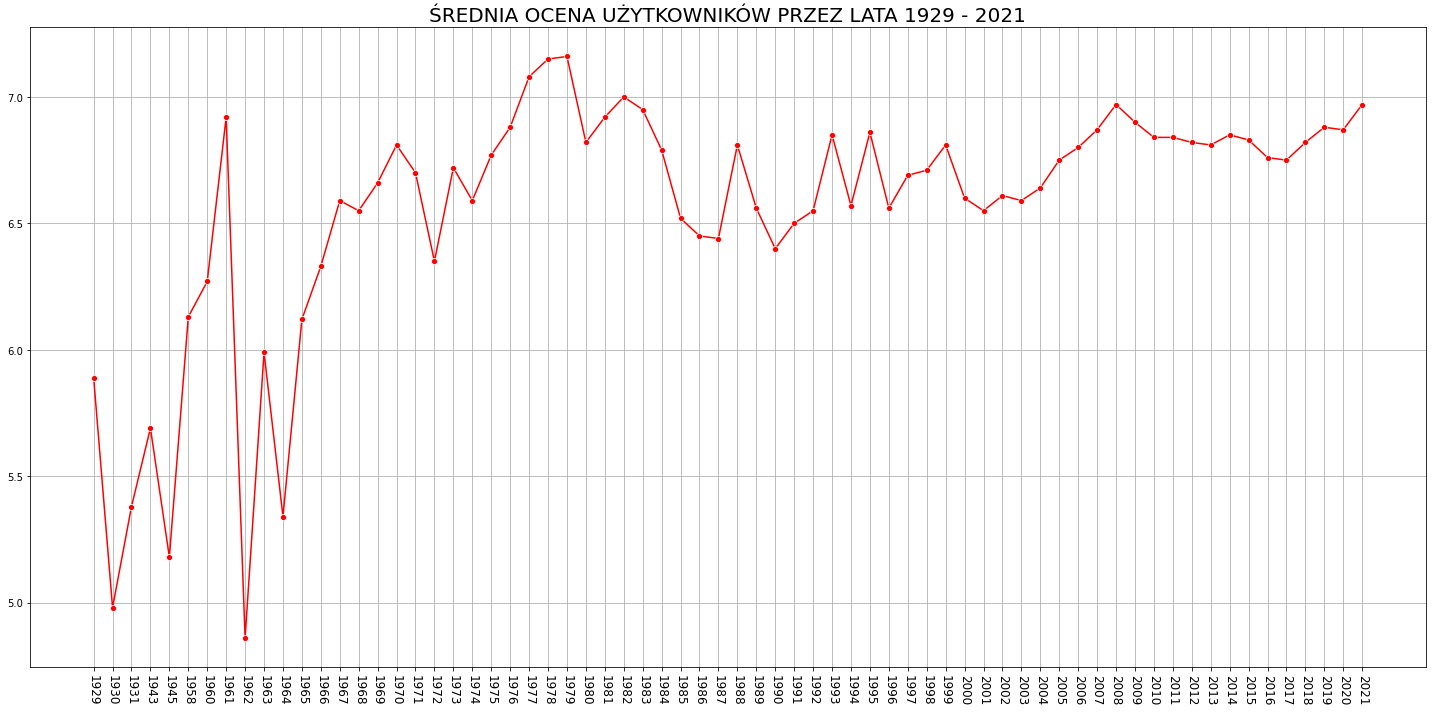

In [381]:

plot_average_year = sns.lineplot(
    x='release_year', y='mean_score', data=anime_year_score, color='red', marker="o")
plot_average_year.set_title(
    'ŚREDNIA OCENA UŻYTKOWNIKÓW PRZEZ LATA 1929 - 2021', fontsize=20)
plot_average_year.set_ylabel('')
plot_average_year.set_xlabel('')
plt.xticks(rotation=-90)
plt.tight_layout()
plt.grid()
plt.show()


In [382]:
anime_year_score_1970 = anime_year_score.copy()
anime_year_score_1970['release_year'] = pd.to_numeric(
    anime_year_score_1970['release_year'])
anime_year_score_1970 = anime_year_score_1970[anime_year_score_1970['release_year'] >= 1970]
anime_year_score_1970 = anime_year_score_1970.reset_index(drop=True)
anime_year_score_1970 = anime_year_score_1970.astype(
    {'release_year': str}, errors='raise')
anime_year_score_1970.head()


,release_year,mean_score
0,1970,6.81
1,1971,6.70
2,1972,6.35
3,1973,6.72
4,1974,6.59


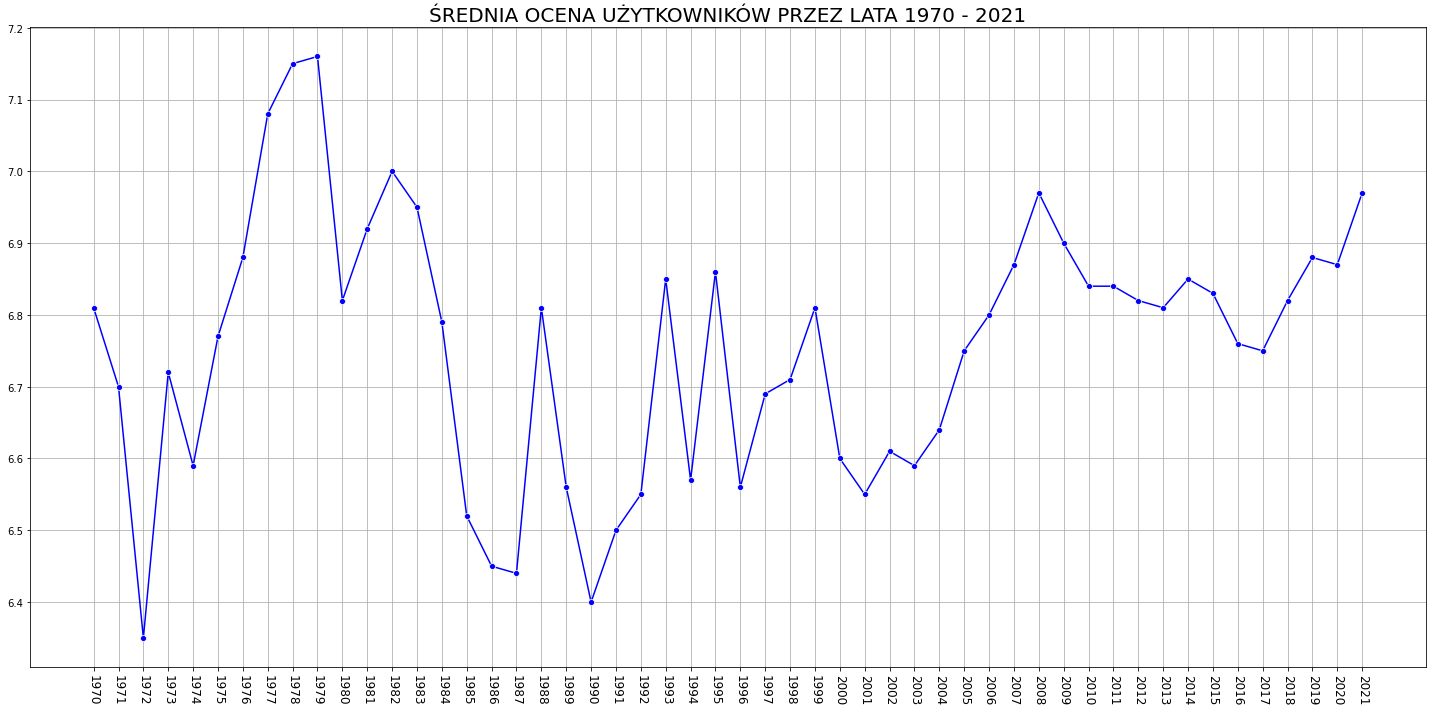

In [383]:
plot_average_year = sns.lineplot(
    x='release_year', y='mean_score', data=anime_year_score_1970, color='blue', marker="o")
plot_average_year.set_title(
    'ŚREDNIA OCENA UŻYTKOWNIKÓW PRZEZ LATA 1970 - 2021', fontsize=20)
plot_average_year.set_ylabel('')
plot_average_year.set_xlabel('')
plt.xticks(rotation=-90)
plt.tight_layout()
plt.grid()
plt.show()


# Zauważalne skoki

In [384]:
curious = anime_popularity_sort.copy()
curious = curious.head(10000)
curious['start_date'] = curious['start_date'].str.split("-").str[0]
curious.dropna(subset=['mean'], inplace=True)
curious = curious.sort_values(by=['rank', 'popularity'], ascending=[
                              True, False], ignore_index=True)

curious_1978 = curious[curious['start_date'] == '1978']
curious_1978 = curious_1978.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_1978.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,302,Mirai Shounen Conan,1978,1978-10-31,8.09,451.0,2853,43482,14747,white,"[{'id': 2, 'name': 'Adventure'}, {'id': 8, 'na...",tv,finished_airing,26,novel,1740,pg_13,"[{'id': 22, 'name': 'Nippon Animation'}]","[{'node': {'id': 2613, 'title': 'Mirai Shounen...",[],"[{'node': {'id': 160, 'title': 'Ima, Soko ni I...",https://api-cdn.myanimelist.net/images/anime/6...,https://api-cdn.myanimelist.net/images/anime/6...,[The Boy in Future],Future Boy Conan,未来少年コナン,1978.0,spring,1974,18119,1405,911,21069,43478,NaN,NaN
1,2618,Takarajima,1978,1979-04-01,7.94,651.0,4478,17495,6003,white,"[{'id': 2, 'name': 'Adventure'}, {'id': 8, 'na...",tv,finished_airing,26,novel,1460,pg_13,"[{'id': 11, 'name': 'Madhouse'}, {'id': 73, 'n...","[{'node': {'id': 11685, 'title': 'Takarajima M...",[],"[{'node': {'id': 21, 'title': 'One Piece', 'ma...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Treasure Island,宝島,1978.0,fall,748,7519,497,422,8307,17493,NaN,NaN
2,1491,Ginga Tetsudou 999,1978,1981-04-09,7.80,883.0,3414,31274,6117,white,"[{'id': 2, 'name': 'Adventure'}, {'id': 8, 'na...",tv,finished_airing,113,manga,1500,g,"[{'id': 18, 'name': 'Toei Animation'}]","[{'node': {'id': 1301, 'title': 'Ginga Tetsudo...",[],"[{'node': {'id': 486, 'title': 'Kino no Tabi: ...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,"[Galaxy Express 999, Ginga Tetsudo 999, GE999]",,銀河鉄道９９９,1978.0,fall,2651,5899,2424,1428,18873,31275,NaN,NaN


In [385]:
curious_1979 = curious[curious['start_date'] == '1979']
curious_1979 = curious_1979.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_1979.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,338,Versailles no Bara,1979,1980-09-03,8.33,212.0,1966,84121,26038,white,"[{'id': 8, 'name': 'Drama'}, {'id': 13, 'name'...",tv,finished_airing,40,manga,1465,pg_13,"[{'id': 65, 'name': 'Tokyo Movie Shinsha'}]","[{'node': {'id': 3868, 'title': 'Versailles no...",[],"[{'node': {'id': 440, 'title': 'Shoujo Kakumei...",https://api-cdn.myanimelist.net/images/anime/9...,https://api-cdn.myanimelist.net/images/anime/9...,[Berusaiyu no Bara],The Rose of Versailles,ベルサイユのばら,1979.0,fall,5389,29609,4423,2687,42008,84116,NaN,NaN
1,1430,Lupin III: Cagliostro no Shiro,1979,1979-12-15,8.15,383.0,1708,103413,65832,white,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",movie,finished_airing,1,manga,5970,pg_13,"[{'id': 65, 'name': 'Tokyo Movie Shinsha'}]","[{'node': {'id': 1412, 'title': 'Lupin III', '...",[],"[{'node': {'id': 513, 'title': 'Tenkuu no Shir...",https://api-cdn.myanimelist.net/images/anime/5...,https://api-cdn.myanimelist.net/images/anime/5...,[Rupan Sansei],Lupin III: The Castle of Cagliostro,ルパン三世 カリオストロの城,1979.0,fall,1401,83258,544,364,17852,103419,NaN,NaN
2,2471,Doraemon (1979),1979,2005-03-18,7.76,959.0,2563,53314,32336,white,"[{'id': 2, 'name': 'Adventure'}, {'id': 51, 'n...",tv,finished_airing,1787,manga,660,pg,"[{'id': 247, 'name': 'Shin-Ei Animation'}]","[{'node': {'id': 501, 'title': 'Doraemon', 'ma...",[],"[{'node': {'id': 4936, 'title': 'Ninja Hattori...",https://api-cdn.myanimelist.net/images/anime/3...,https://api-cdn.myanimelist.net/images/anime/3...,[],Doraemon,ドラえもん,1979.0,spring,4865,30262,4713,8052,5427,53319,NaN,NaN


In [386]:
curious_1988 = curious[curious['start_date'] == '1988']
curious_1988 = curious_1988.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_1988.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,820,Ginga Eiyuu Densetsu,1988,1997-03-17,9.03,11.0,699,280299,70110,white,"[{'id': 50, 'name': 'Adult Cast'}, {'id': 8, '...",ova,finished_airing,110,novel,1560,r,"[{'id': 1269, 'name': 'K-Factory'}, {'id': 225...","[{'node': {'id': 3016, 'title': 'Ginga Eiyuu D...",[],"[{'node': {'id': 1575, 'title': 'Code Geass: H...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,"[LoGH, LotGH, Gin'eiden, GinEiDen, Heldensagen...",Legend of the Galactic Heroes,銀河英雄伝説,1988.0,winter,30256,63135,17617,7205,162100,280313,NaN,NaN
1,578,Hotaru no Haka,1988,1988-04-16,8.51,114.0,304,577537,345931,white,"[{'id': 8, 'name': 'Drama'}, {'id': 13, 'name'...",movie,finished_airing,1,novel,5280,pg_13,"[{'id': 21, 'name': 'Studio Ghibli'}]",[],[],"[{'node': {'id': 15227, 'title': 'Kono Sekai n...",https://api-cdn.myanimelist.net/images/anime/7...,https://api-cdn.myanimelist.net/images/anime/7...,[Tombstone for Fireflies],Grave of the Fireflies,火垂るの墓,1988.0,spring,8096,430737,3564,1564,133618,577579,NaN,NaN
2,523,Tonari no Totoro,1988,1988-04-16,8.26,270.0,136,924242,603112,white,"[{'id': 2, 'name': 'Adventure'}, {'id': 37, 'n...",movie,finished_airing,1,original,5185,g,"[{'id': 21, 'name': 'Studio Ghibli'}]","[{'node': {'id': 2488, 'title': 'Mei to Koneko...",[],"[{'node': {'id': 12355, 'title': 'Ookami Kodom...",https://api-cdn.myanimelist.net/images/anime/4...,https://api-cdn.myanimelist.net/images/anime/4...,[My Neighbour Totoro],My Neighbor Totoro,となりのトトロ,1988.0,spring,10677,798500,3044,1425,110667,924313,NaN,NaN


In [387]:
curious_1993 = curious[curious['start_date'] == '1993']
curious_1993 = curious_1993.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_1993.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,170,Slam Dunk,1993,1996-03-23,8.54,98.0,775,255644,118609,white,"[{'id': 23, 'name': 'School'}, {'id': 27, 'nam...",tv,finished_airing,101,manga,1380,pg_13,"[{'id': 18, 'name': 'Toei Animation'}]","[{'node': {'id': 1764, 'title': 'Slam Dunk (Mo...",[],"[{'node': {'id': 11771, 'title': 'Kuroko no Ba...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Slam Dunk,スラムダンク,1993.0,fall,20454,133350,15165,9540,77124,255633,NaN,NaN
1,4921,Ramayana: The Legend of Prince Rama,1993,1993-01-15,8.18,354.0,6755,6245,3477,white,"[{'id': 2, 'name': 'Adventure'}]",movie,finished_airing,1,other,8100,g,"[{'id': 2010, 'name': 'Nippon Ramayana Film Co...",[],[],"[{'node': {'id': 249, 'title': 'InuYasha', 'ma...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,"[Ramayana: Rama Ouji Densetsu, The Warrior Pri...",Ramayana: The Legend of Prince Rama,ラーマーヤナ ラーマ王子伝説,1993.0,winter,151,4177,66,118,1732,6244,NaN,NaN
2,3016,Ginga Eiyuu Densetsu: Arata Naru Tatakai no Ov...,1993,1993-12-18,8.10,445.0,3432,30860,15763,white,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",movie,finished_airing,1,novel,5400,pg_13,"[{'id': 207, 'name': 'Magic Bus'}, {'id': 2256...","[{'node': {'id': 820, 'title': 'Ginga Eiyuu De...",[],"[{'node': {'id': 1090, 'title': 'Mobile Suit G...",https://api-cdn.myanimelist.net/images/anime/8...,https://api-cdn.myanimelist.net/images/anime/8...,"[LoGH: Overture to a New War, Ginga Eiyu Dense...",Legend of the Galactic Heroes: Overture to a N...,銀河英雄伝説外伝 新たなる戦いの序曲[オーヴァチュア],1993.0,fall,578,19847,344,267,9826,30862,NaN,NaN


In [388]:
curious_1995 = curious[curious['start_date'] == '1995']
curious_1995 = curious_1995.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_1995.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,30,Neon Genesis Evangelion,1995,1996-03-27,8.34,206.0,48,1554369,926447,white,"[{'id': 1, 'name': 'Action'}, {'id': 5, 'name'...",tv,finished_airing,26,original,1441,pg_13,"[{'id': 6, 'name': 'Gainax'}, {'id': 103, 'nam...","[{'node': {'id': 31, 'title': 'Neon Genesis Ev...",[],"[{'node': {'id': 9756, 'title': 'Mahou Shoujo ...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Shinseiki Evangelion],Neon Genesis Evangelion,新世紀エヴァンゲリオン,1995.0,fall,98140,1095885,47706,27328,285237,1554296,NaN,NaN
1,2559,Romeo no Aoi Sora,1995,1995-12-17,8.34,208.0,2814,44384,15662,white,"[{'id': 2, 'name': 'Adventure'}, {'id': 8, 'na...",tv,finished_airing,33,novel,1410,pg_13,"[{'id': 22, 'name': 'Nippon Animation'}]","[{'node': {'id': 23581, 'title': 'Romeo no Aoi...",[],"[{'node': {'id': 2828, 'title': 'Ie Naki Ko', ...",https://api-cdn.myanimelist.net/images/anime/4...,https://api-cdn.myanimelist.net/images/anime/4...,"[Sekai Meisaku Gekijou, Romeo's Blue Skies, Ro...",Romeo and the Black Brothers,ロミオの青い空,1995.0,winter,1844,19718,1119,801,20904,44386,NaN,NaN
2,43,Koukaku Kidoutai,1995,1995-11-18,8.28,252.0,322,555789,293850,white,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",movie,finished_airing,1,manga,4960,r+,"[{'id': 10, 'name': 'Production I.G'}]","[{'node': {'id': 467, 'title': 'Koukaku Kidout...",[],"[{'node': {'id': 47, 'title': 'Akira', 'main_p...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Ghost in the Shell],Ghost in the Shell,GHOST IN THE SHELL（攻殻機動隊）,1995.0,fall,10333,374783,4232,2238,164188,555774,NaN,NaN


In [389]:
curious_1999 = curious[curious['start_date'] == '1999']
curious_1999 = curious_1999.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_1999.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,1999,1999-09-22,8.71,45.0,767,257473,129390,white,"[{'id': 1, 'name': 'Action'}, {'id': 50, 'name...",ova,finished_airing,4,manga,1800,r,"[{'id': 37, 'name': 'Studio Deen'}]","[{'node': {'id': 45, 'title': 'Rurouni Kenshin...",[],"[{'node': {'id': 67, 'title': 'Basilisk: Kouga...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,"[Rurouni Kenshin: Tsuiokuhen, Rurouni Kenshin:...",Samurai X: Trust and Betrayal,るろうに剣心―明治剣客浪漫譚―追憶編,1999.0,winter,7649,166181,3482,2092,78061,257465,NaN,NaN
1,245,Great Teacher Onizuka,1999,2000-09-17,8.69,50.0,215,725732,360734,white,"[{'id': 4, 'name': 'Comedy'}, {'id': 55, 'name...",tv,finished_airing,43,manga,1550,r,"[{'id': 1, 'name': 'Pierrot'}]","[{'node': {'id': 1913, 'title': 'Shonan Junai ...",[],"[{'node': {'id': 268, 'title': 'Golden Boy', '...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[GTO],Great Teacher Onizuka,グレート・ティーチャー・オニヅカ,1999.0,summer,57142,400272,40389,22014,205881,725698,NaN,NaN
2,21,One Piece,1999,None,8.65,65.0,26,1884603,1071597,white,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",tv,currently_airing,0,manga,1440,pg_13,"[{'id': 18, 'name': 'Toei Animation'}]","[{'node': {'id': 459, 'title': 'One Piece Movi...",[],"[{'node': {'id': 6702, 'title': 'Fairy Tail', ...",https://api-cdn.myanimelist.net/images/anime/6...,https://api-cdn.myanimelist.net/images/anime/6...,[OP],One Piece,ONE PIECE,1999.0,fall,1286396,41,238941,164314,194875,1884567,NaN,NaN


In [390]:
curious_2008 = curious[curious['start_date'] == '2008']
curious_2008 = curious_2008.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_2008.head(3)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,4181,Clannad: After Story,2008,2009-03-27,8.94,18.0,105,1081061,609071,white,"[{'id': 8, 'name': 'Drama'}, {'id': 22, 'name'...",tv,finished_airing,24,visual_novel,1460,pg_13,"[{'id': 2, 'name': 'Kyoto Animation'}]","[{'node': {'id': 1723, 'title': 'Clannad Movie...",[],"[{'node': {'id': 23273, 'title': 'Shigatsu wa ...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Clannad ~After Story~,CLANNAD〜AFTER STORY〜 クラナド アフターストーリー,2008.0,fall,34710,739880,19288,15395,271801,1081074,NaN,NaN
1,2904,Code Geass: Hangyaku no Lelouch R2,2008,2008-09-28,8.91,20.0,47,1569701,1067437,white,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",tv,finished_airing,25,original,1440,r,"[{'id': 14, 'name': 'Sunrise'}]","[{'node': {'id': 1575, 'title': 'Code Geass: H...",[],"[{'node': {'id': 1535, 'title': 'Death Note', ...",https://api-cdn.myanimelist.net/images/anime/4...,https://api-cdn.myanimelist.net/images/anime/4...,"[Code Geass: Hangyaku no Lelouch 2nd Season, C...",Code Geass: Lelouch of the Rebellion R2,コードギアス 反逆のルルーシュ 続編,2008.0,spring,48957,1304714,22239,15577,178221,1569708,NaN,NaN
2,4282,Kara no Kyoukai Movie 5: Mujun Rasen,2008,2008-08-16,8.54,96.0,899,219057,121795,white,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",movie,finished_airing,1,light_novel,6894,r,"[{'id': 43, 'name': 'ufotable'}]","[{'node': {'id': 4280, 'title': 'Kara no Kyouk...",[],"[{'node': {'id': 2251, 'title': 'Baccano!', 'm...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Kara no Kyoukai: The Garden of Sinners Movie ...,the Garden of sinners Chapter 5: Paradox Paradigm,劇場版 空の境界 the Garden of sinners 第五章『矛盾螺旋』,2008.0,summer,4119,155332,1914,820,56871,219056,NaN,NaN


In [391]:
curious_2021 = curious[curious['start_date'] == '2021']
curious_2021 = curious_2021.sort_values(by=['rank', 'popularity'], ascending=[
                                        True, False], ignore_index=True)

curious_2021.head(6)


,id,title,start_date,end_date,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,genres,media_type,status,num_episodes,source,average_episode_duration,rating,studios,related_anime,related_manga,recommendations,main_picture.medium,main_picture.large,alternative_titles.synonyms,alternative_titles.en,alternative_titles.ja,start_season.year,start_season.season,statistics.status.watching,statistics.status.completed,statistics.status.on_hold,statistics.status.dropped,statistics.status.plan_to_watch,statistics.num_list_users,start_season,main_picture
0,39486,Gintama: The Final,2021,2021-01-08,9.05,6.0,1709,103352,49051,white,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'...",movie,finished_airing,1,manga,6240,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]","[{'node': {'id': 37491, 'title': 'Gintama.: Sh...",[],[],https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Gintama: The Very Final,銀魂 THE FINAL,2021.0,winter,4974,52129,1139,923,44176,103341,NaN,NaN
1,42938,Fruits Basket: The Final,2021,2021-06-29,9.04,8.0,537,349590,168362,white,"[{'id': 8, 'name': 'Drama'}, {'id': 22, 'name'...",tv,finished_airing,13,manga,1380,pg_13,"[{'id': 73, 'name': 'TMS Entertainment'}]","[{'node': {'id': 40417, 'title': 'Fruits Baske...",[],"[{'node': {'id': 4181, 'title': 'Clannad: Afte...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,"[Fruits Basket 3rd Season, Fruits Basket (2019...",Fruits Basket: The Final Season,フルーツバスケット The Final,2021.0,spring,31790,187519,4768,2984,122582,349643,NaN,NaN
2,47778,Kimetsu no Yaiba: Yuukaku-hen,2021,2022-02-13,8.87,23.0,146,885876,519216,white,"[{'id': 1, 'name': 'Action'}, {'id': 10, 'name...",tv,finished_airing,11,manga,1595,r,"[{'id': 43, 'name': 'ufotable'}]","[{'node': {'id': 40456, 'title': 'Kimetsu no Y...",[],"[{'node': {'id': 40748, 'title': 'Jujutsu Kais...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Demon Slayer: Kimetsu no Yaiba Entertainment D...,鬼滅の刃 遊郭編,2022.0,winter,120325,593928,5838,1983,163733,885807,NaN,NaN
3,44074,Shiguang Dailiren,2021,2021-07-09,8.80,33.0,928,211744,69111,white,"[{'id': 8, 'name': 'Drama'}, {'id': 37, 'name'...",ona,finished_airing,11,original,1438,pg_13,"[{'id': 1774, 'name': 'Studio LAN'}]","[{'node': {'id': 49200, 'title': 'Shiguang Dai...",[],"[{'node': {'id': 9253, 'title': 'Steins;Gate',...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[Shi Guang Dai Li Ren],Link Click,时光代理人,2021.0,spring,23835,73540,5522,2757,106131,211785,NaN,NaN
4,45576,Mushoku Tensei: Isekai Ittara Honki Dasu Part 2,2021,2021-12-20,8.74,40.0,290,593305,349486,white,"[{'id': 8, 'name': 'Drama'}, {'id': 9, 'name':...",tv,finished_airing,12,light_novel,1427,r,"[{'id': 1993, 'name': 'Studio Bind'}]","[{'node': {'id': 39535, 'title': 'Mushoku Tens...",[],"[{'node': {'id': 48414, 'title': 'Sabikui Bisc...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Mushoku Tensei: Jobless Reincarnation Part 2,無職転生 ～異世界行ったら本気だす～ 第2クール,2021.0,fall,72112,404054,5554,3329,108276,593325,NaN,NaN
5,46102,Odd Taxi,2021,2021-06-29,8.74,41.0,618,309251,150214,white,"[{'id': 51, 'name': 'Anthropomorphic'}, {'id':...",tv,finished_airing,13,original,1430,pg_13,"[{'id': 28, 'name': 'OLM'}, {'id': 1872, 'name...","[{'node': {'id': 50653, 'title': 'Odd Taxi Mov...",[],"[{'node': {'id': 6746, 'title': 'Durarara!!', ...",https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,[],Odd Taxi,オッドタクシー,2021.0,spring,30632,161976,7455,4492,104763,309318,NaN,NaN


# Popularność gatunków

In [392]:
genres_df = pd.json_normalize(data=anime_data, record_path=['genres'], meta=[
                              'start_date', ['statistics', 'status', 'completed']])
genres_df


,id,name,start_date,statistics.status.completed
0,1,Action,2009-04-05,2093504
1,2,Adventure,2009-04-05,2093504
2,8,Drama,2009-04-05,2093504
3,10,Fantasy,2009-04-05,2093504
4,38,Military,2009-04-05,2093504
...,...,...,...,...
58091,12,Hentai,2022-08-28,0
58092,1,Action,1990-11-21,134
58093,4,Comedy,1990-11-21,134
58094,12,Hentai,1990-11-21,134


In [393]:
genres_count = genres_df.copy()
genres_count['start_date'] = genres_count['start_date'].str.split("-").str[0]
genres_count = genres_count.drop('id', 1)
genres_count.columns = ['genre', 'release_date', 'completed']
genres_count['completed'] = pd.to_numeric(genres_count['completed'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(genres_count)
genres_count


/tmp/ipykernel_19213/3149348835.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  genres_count = genres_count.drop('id', 1)


,genre,release_date,completed
0,Action,2009,2093504
1,Adventure,2009,2093504
2,Drama,2009,2093504
3,Fantasy,2009,2093504
4,Military,2009,2093504
...,...,...,...
58091,Hentai,2022,0
58092,Action,1990,134
58093,Comedy,1990,134
58094,Hentai,1990,134


In [394]:
genres_count_year = genres_count.groupby(['genre', 'release_date'])[
    'completed'].agg(['sum', 'count']).reset_index()
genres_count_year.columns = ['genre', 'release_date', 'completed', 'count']
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(genres_count_year)
genres_count_year


,genre,release_date,completed,count
0,Action,1928,1260,1
1,Action,1929,1899,2
2,Action,1931,4517,4
3,Action,1932,1844,2
4,Action,1933,3151,5
...,...,...,...,...
3191,Workplace,2018,996664,12
3192,Workplace,2019,207143,13
3193,Workplace,2020,96642,5
3194,Workplace,2021,361777,15


In [395]:
genres_count_year = genres_count_year.sort_values(
    by=['genre', 'release_date'], ascending=[True, True], ignore_index=True)
genres_count_year['release_date'] = pd.to_numeric(
    genres_count_year['release_date'])
genres_count_year = genres_count_year[genres_count_year['release_date'] >= 1970]
genres_count_year = genres_count_year[genres_count_year['release_date'] <= 2021]
genres_count_year = genres_count_year.reset_index(drop=True)
genres_count_year = genres_count_year.astype(
    {'release_date': str}, errors='raise')
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(genres_count_year)
genres_count_year


,genre,release_date,completed,count
0,Action,1970,20547,3
1,Action,1971,35552,7
2,Action,1972,20001,7
3,Action,1973,6735,5
4,Action,1974,15507,7
...,...,...,...,...
2693,Workplace,2017,796606,12
2694,Workplace,2018,996664,12
2695,Workplace,2019,207143,13
2696,Workplace,2020,96642,5


In [436]:
grouped = genres_count_year.groupby(
    'genre')['release_date', 'completed', 'count']
for name, group in grouped:
    ax1 = sns.lineplot(x='release_date', y='count',
                       data=group, color='red', marker="o", label='ilośc wydań')
    ax1.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='release_date', y='completed', data=group,
                       color='blue', marker='o', label='ilość obejrzeń')
    # ax2.ticklabel_format(style='plain')
    ax2.legend(loc='upper right')
    ax1.set_title(
        f'POPULARNOŚĆ GATUNKU {name} PRZEZ LATA 1970 - 2021', fontsize=20)
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_xlabel('')
    # plt.xticks(rotation=-90)
    # plt.ticklabel_format(style='plain')
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax1.tick_params(labelrotation=-90)
    plt.tight_layout()
    ax1.grid()
    plt.savefig(f'genres/png/{name}.png',
                bbox_inches='tight', facecolor='white')
    plt.savefig(f'genres/pdf/{name}.pdf',
                bbox_inches='tight', facecolor='white')
    plt.clf()


/tmp/ipykernel_19213/2230044903.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = genres_count_year.groupby(


<Figure size 1440x720 with 0 Axes>

# Bonus wykres reincarnation + isekai

In [459]:
reinc = grouped.get_group('Reincarnation')
isekai = grouped.get_group('Isekai')
isekai_reinc = pd.concat([reinc, isekai]).groupby('release_date')[
    'completed', 'count'].sum().reset_index()
isekai_reinc


/tmp/ipykernel_19213/2131835215.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  isekai_reinc = pd.concat([reinc, isekai]).groupby('release_date')['completed', 'count'].sum().reset_index()


,release_date,completed,count
0,1994,33820,1
1,1995,98878,4
2,1996,111888,4
3,1997,38305,4
4,1999,444258,6
5,2000,87195,3
6,2001,168707,2
7,2002,210718,4
8,2003,1348,1
9,2004,145787,4


In [460]:
ax1 = sns.lineplot(x='release_date', y='count', data=isekai_reinc,
                   color='red', marker="o", label='ilośc wydań')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='release_date', y='completed', data=isekai_reinc,
                   color='blue', marker='o', label='ilość obejrzeń')
ax2.legend(loc='upper right')
ax1.set_title(
    f'POPULARNOŚĆ GATUNKU ISEKAI + REINCARNATION PRZEZ LATA 1970 - 2021', fontsize=20)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.tick_params(labelrotation=-90)
plt.tight_layout()
ax1.grid()
plt.savefig(f'genres/png/isekai_reinc.png',
            bbox_inches='tight', facecolor='white')
plt.savefig(f'genres/pdf/isekai_reinc.pdf',
            bbox_inches='tight', facecolor='white')
plt.clf()


<Figure size 1440x720 with 0 Axes>